In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca Data
df_filtered = pd.read_csv("buyer.csv", delimiter=";")

# 3. Standardisasi Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered[['total_orders', 'total_revenue']])


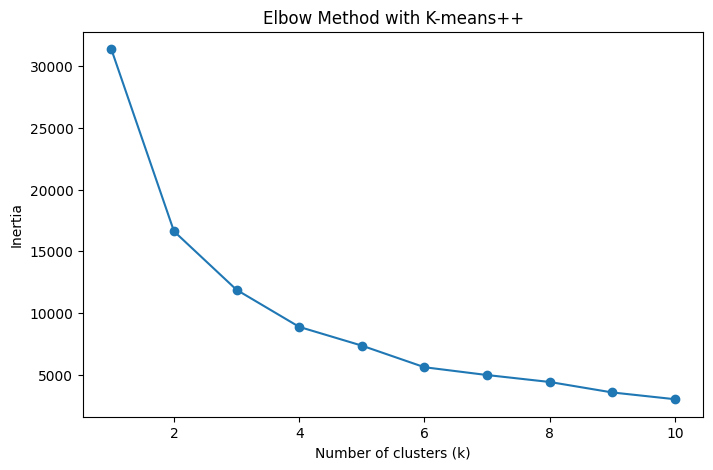

In [2]:
# 4. Elbow Method dengan K-means++
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with K-means++')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.9661121146861454
For n_clusters = 3 The average silhouette_score is : 0.9237917816621276
For n_clusters = 4 The average silhouette_score is : 0.8959059447883205
For n_clusters = 5 The average silhouette_score is : 0.8939788935152051
For n_clusters = 6 The average silhouette_score is : 0.8918245128801136


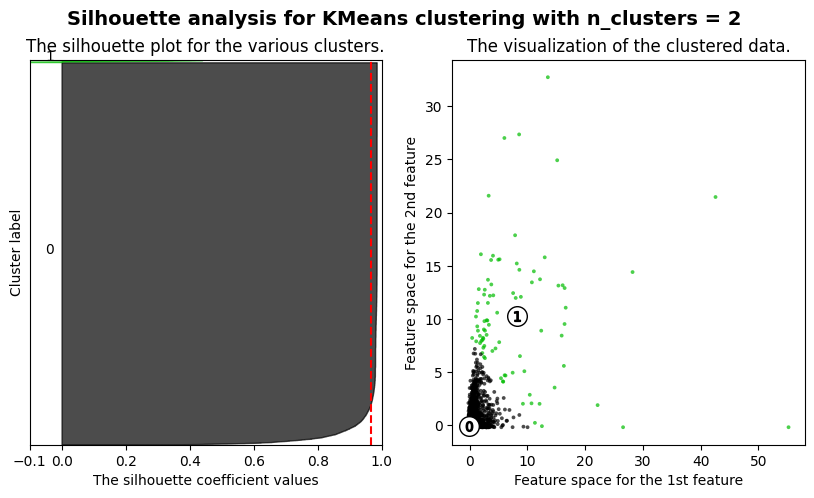

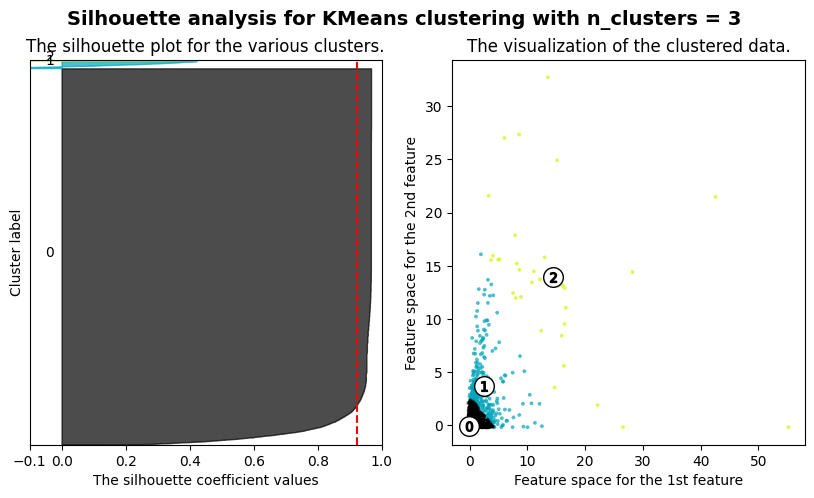

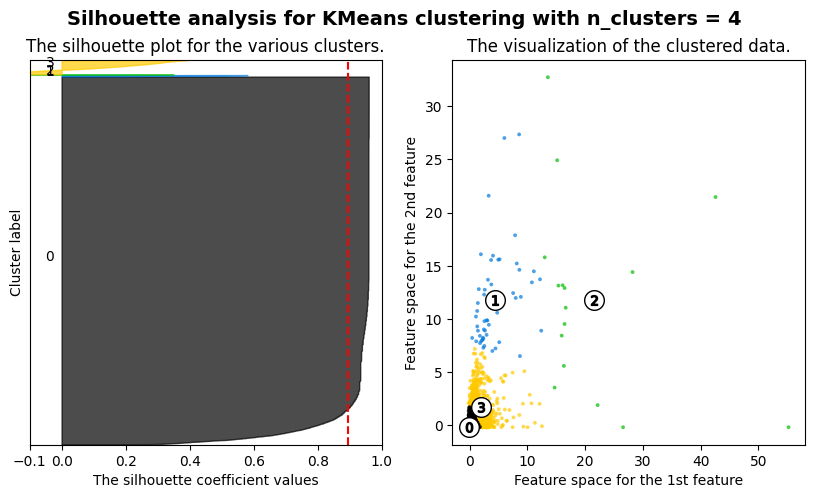

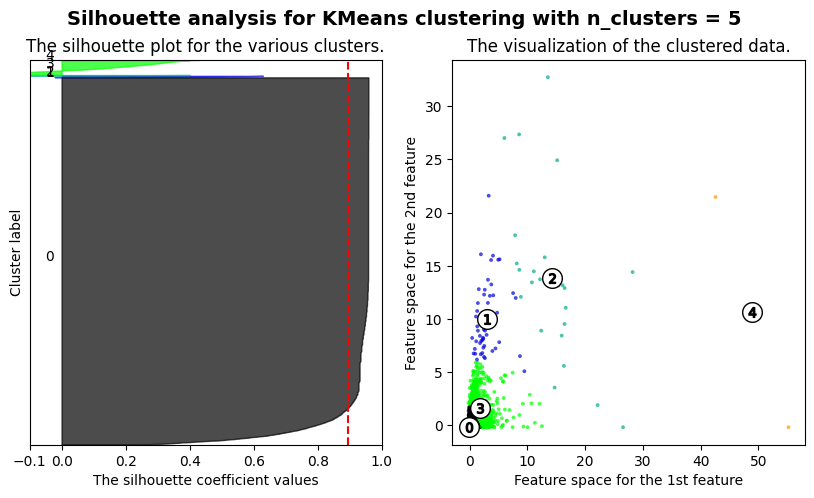

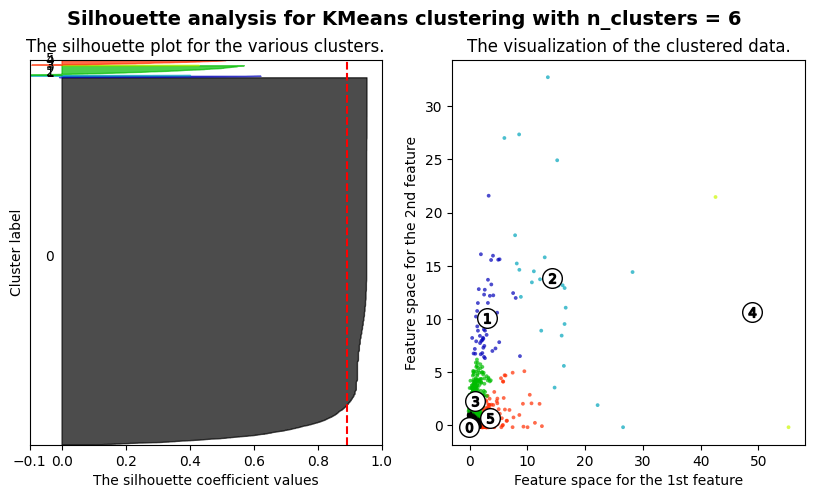

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def silhouette_analysis(data, cluster=[2, 3, 4]):
    # Cek jika data sudah berupa numpy array, jika tidak, konversi
    if isinstance(data, np.ndarray):
        X = data
    else:
        X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

# Contoh penggunaan dengan data yang sudah dinormalisasi
silhouette_analysis(df_scaled, list(range(2, 7)))


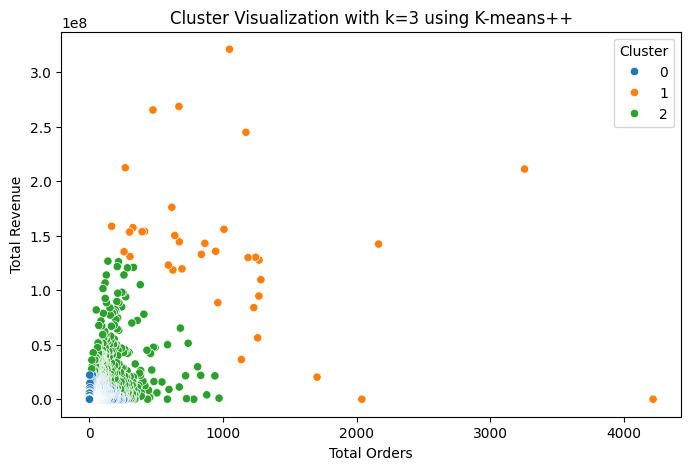

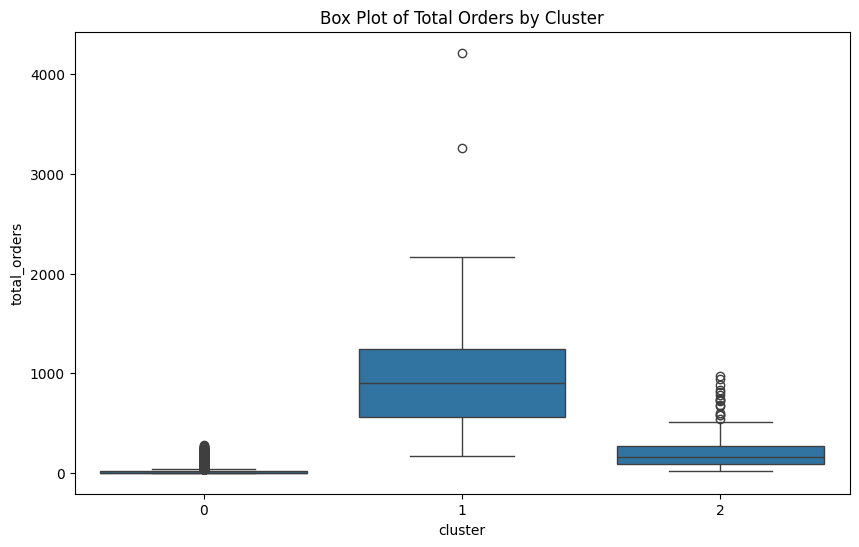

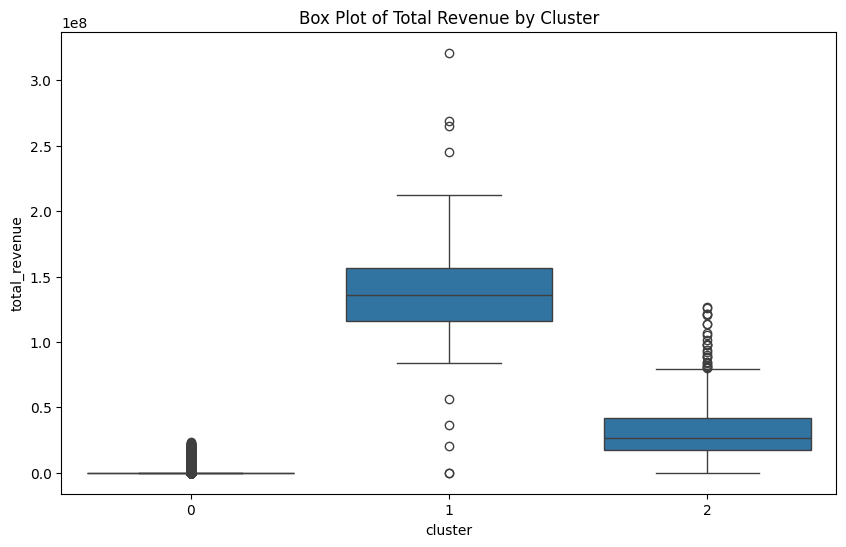

In [10]:
# 6. Terapkan K-Means dengan jumlah cluster yang dipilih
k_optimal = 3  # Misalnya hasil dari analisis sebelumnya
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=0)
df_filtered['cluster'] = kmeans.fit_predict(df_scaled)

# Visualisasi Cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered['total_orders'], y=df_filtered['total_revenue'], hue=df_filtered['cluster'], palette='tab10')
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue')
plt.title(f'Cluster Visualization with k={k_optimal} using K-means++')
plt.legend(title='Cluster')
plt.show()

# 7. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_orders', data=df_filtered)
plt.title('Box Plot of Total Orders by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_revenue', data=df_filtered)
plt.title('Box Plot of Total Revenue by Cluster')
plt.show()



In [5]:
result_df = df_filtered[['user_id', 'total_orders', 'total_revenue', 'cluster']]
result_df.head(100)

,user_id,total_orders,total_revenue,cluster
0,648bc47a8e878d0949614b28,4216,0,1
1,631e4709049b5bbe3145b0e1,3255,211210972,1
2,631e2964df5e0b1702afd3cf,2163,142350514,1
3,631e4e7de5e161518eff4548,2038,0,1
4,631e3be3f6f16759f9da3800,1703,20268117,1
...,...,...,...,...
95,631e2663df5e0b1702afbab6,299,10801328,2
96,6320297036adb3394d4f6918,297,43022004,2
97,631e2233df5e0b1702af9bb7,296,569986,2
98,631e21e7df5e0b1702af99c3,295,14756699,2


In [6]:
result_df.to_csv("clustered_data.csv", index=False)